# https://data.world/gautam2510/credit-card-dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import max_error, mean_absolute_error as mae, median_absolute_error as medae, mean_squared_log_error as msle
from sklearn.metrics import r2_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
import cufflinks as cf
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
cf.go_offline()

In [3]:
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [5]:
df = pd.read_csv('CreditCardDataset_cleaned.csv')
df

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accnt_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,0,Air Miles,Letter,High,1,No,3,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,0,Air Miles,Letter,Medium,1,No,2,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,0,Air Miles,Postcard,High,2,No,2,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,0,Air Miles,Letter,Medium,2,No,3,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,0,Air Miles,Letter,Medium,1,No,2,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,0,Cash Back,Letter,High,1,No,1,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17972,0,Cash Back,Letter,High,1,No,1,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17973,0,Cash Back,Letter,High,1,No,1,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17974,0,Cash Back,Letter,Medium,1,No,2,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Offer_Accepted        17976 non-null  int64  
 1   Reward                17976 non-null  object 
 2   Mailer_Type           17976 non-null  object 
 3   Income_Level          17976 non-null  object 
 4   Bank_Accnt_Open       17976 non-null  int64  
 5   Overdraft_Protection  17976 non-null  object 
 6   Credit_Rating         17976 non-null  int64  
 7   Credit_Cards_Held     17976 non-null  int64  
 8   Homes_Owned           17976 non-null  int64  
 9   Household_Size        17976 non-null  int64  
 10  Own_Your_Home         17976 non-null  object 
 11  Average_Balance       17976 non-null  float64
 12  Q1_Balance            17976 non-null  float64
 13  Q2_Balance            17976 non-null  float64
 14  Q3_Balance            17976 non-null  float64
 15  Q4_Balance         

In [7]:
df.describe()

,Offer_Accepted,Bank_Accnt_Open,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
count,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,0.056798,1.255730,2.006453,1.903427,1.203549,3.499110,940.515562,910.450656,999.392190,1042.033600,810.185803
std,0.231463,0.472405,0.817447,0.797086,0.427446,1.114476,350.297837,620.077060,457.402268,553.452599,559.001365
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,0.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,0.000000,1.000000,3.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,1.000000,3.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


# Visualisation

In [8]:
df['Reward'].iplot(kind='hist',title='Jumlah nasabah yang memiliki Reward tertentu')
#using cufflinks

In [9]:
df.head()

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accnt_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,0,Air Miles,Letter,High,1,No,3,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,0,Air Miles,Letter,Medium,1,No,2,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,0,Air Miles,Postcard,High,2,No,2,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,0,Air Miles,Letter,Medium,2,No,3,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,0,Air Miles,Letter,Medium,1,No,2,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


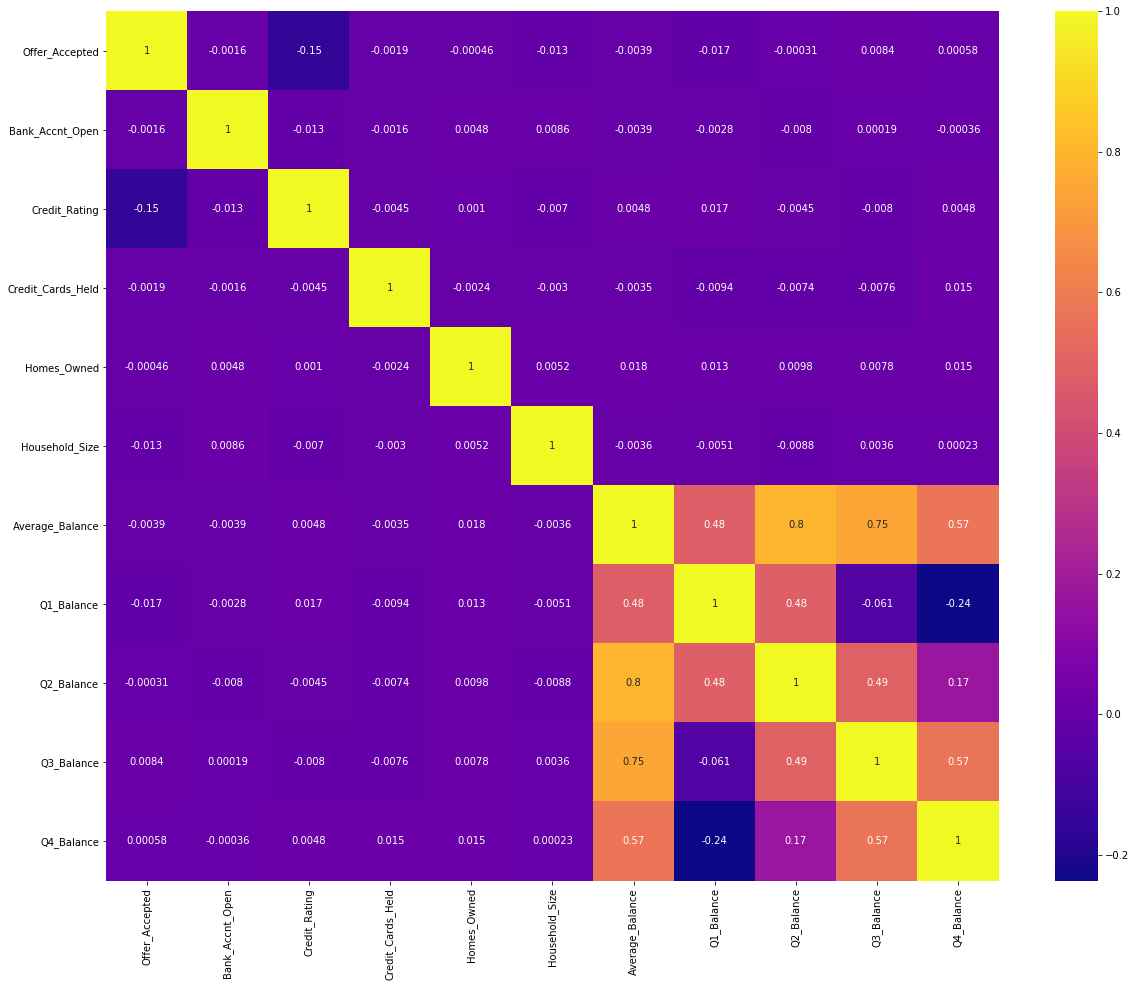

In [10]:
plt.figure(figsize=(20,16))
sns.heatmap(data=df.corr(),annot=True,cmap='plasma')

# ##

# Average_Balance >< Credit_Rating

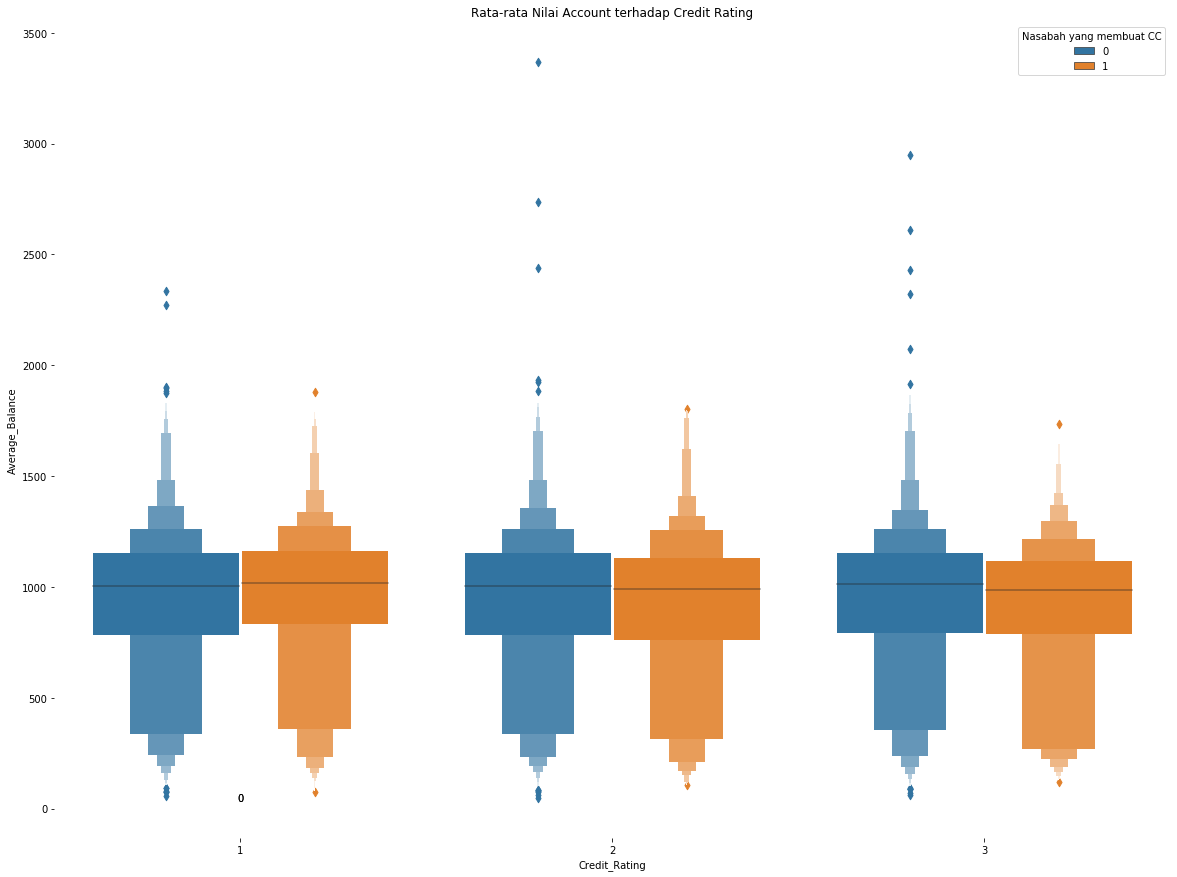

In [11]:
plt.figure(figsize=(20,15))
ax = sns.boxenplot(data=df, x='Credit_Rating',y='Average_Balance',hue='Offer_Accepted')
for i in ax.patches: #making annotation
    ax.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2.,i.get_height()),
               ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')
    

sns.despine(left=True, bottom=True, right=True) #only remove the frame
#ax.axis('off') #remove frame and all details
plt.title('Rata-rata Nilai Account terhadap Credit Rating')
plt.legend(title='Nasabah yang membuat CC')


# Bank Account Open

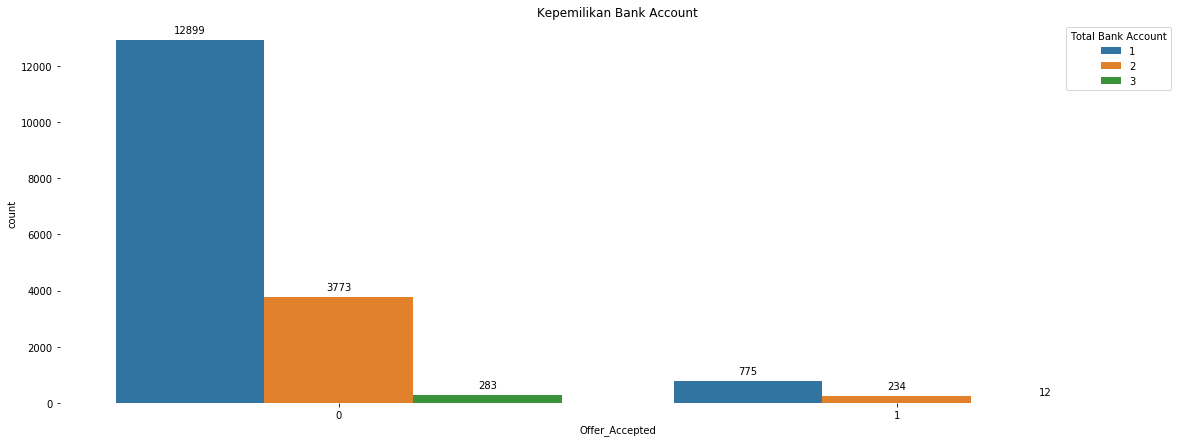

In [12]:
#people who accept offers with numbers of bank account
plt.figure(figsize=(20,7))
ax = sns.countplot(data=df, x='Offer_Accepted',hue='Bank_Accnt_Open')
for i in ax.patches: #making annotation
    ax.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2.,i.get_height()),
               ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')
    

sns.despine(left=True, bottom=True, right=True) #only remove the frame
#ax.axis('off') #remove frame and all details
plt.title('Kepemilikan Bank Account')
plt.legend(title='Total Bank Account')


# Credit Card Held

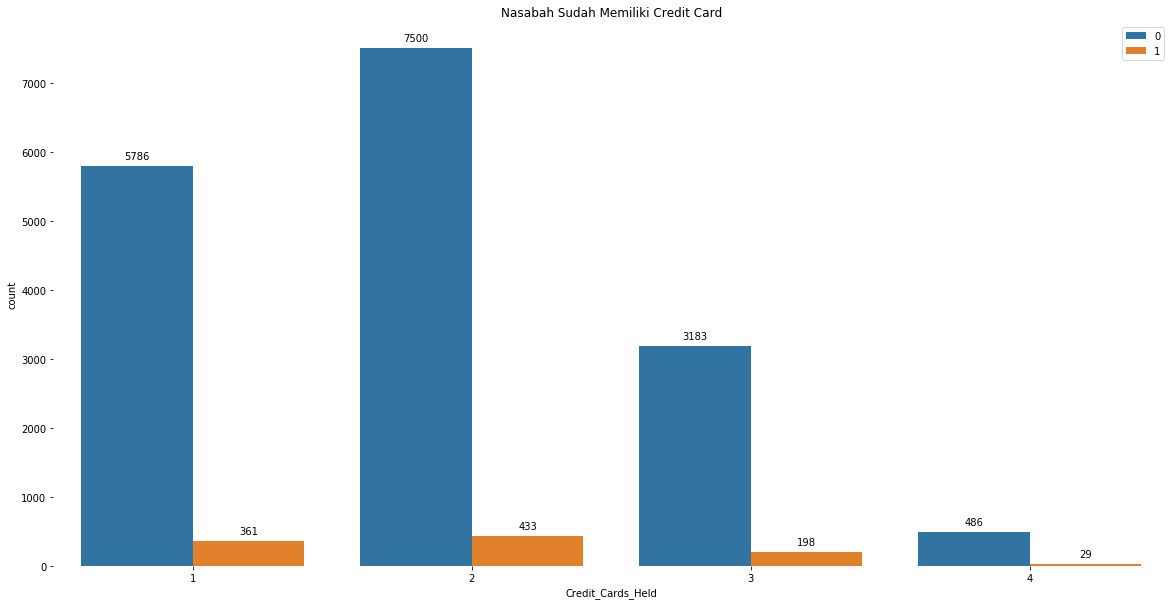

In [13]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=df, x='Credit_Cards_Held',hue='Offer_Accepted')
for i in ax.patches: #making annotation
    ax.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2,i.get_height()),
               ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')
sns.despine(left=True, bottom=True, right=True) #only remove the frame
plt.title('Nasabah Sudah Memiliki Credit Card')
plt.legend()

# Overdraft_Protection

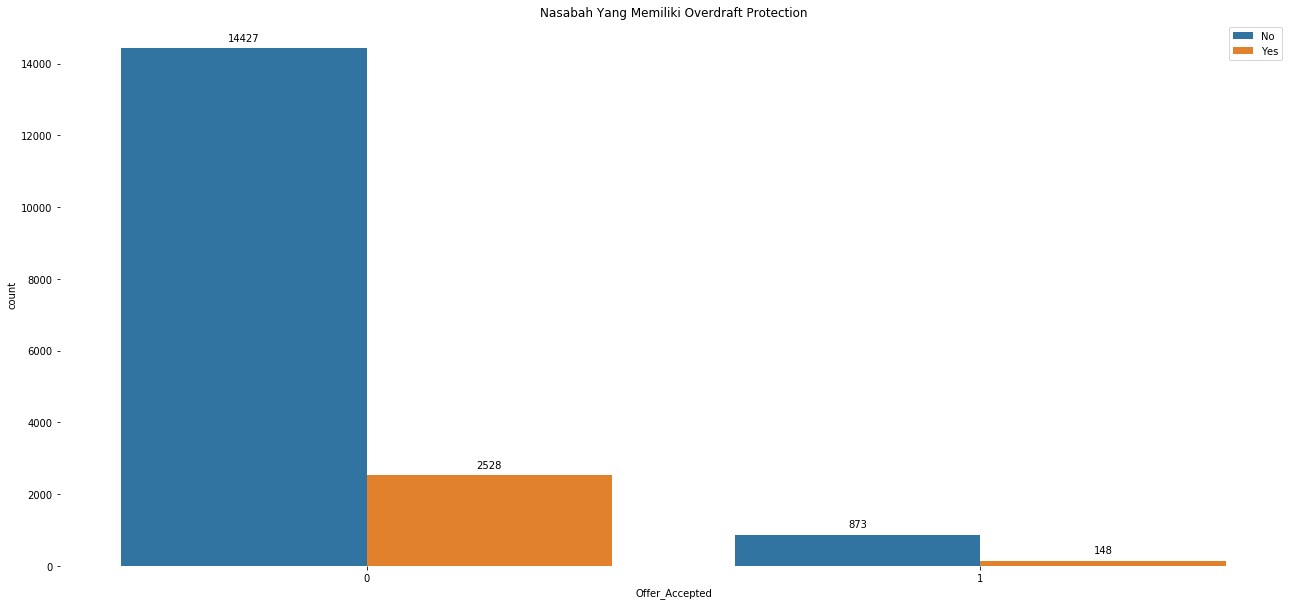

In [14]:
plt.figure(figsize=(22,10))
ay = sns.countplot(data=df, x='Offer_Accepted',hue='Overdraft_Protection')
for i in ay.patches: #making annotation
    ay.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2.,i.get_height()),
               ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')

sns.despine(left=True, bottom=True, right=True)
plt.title('Nasabah Yang Memiliki Overdraft Protection')
plt.legend()

# Household_Size

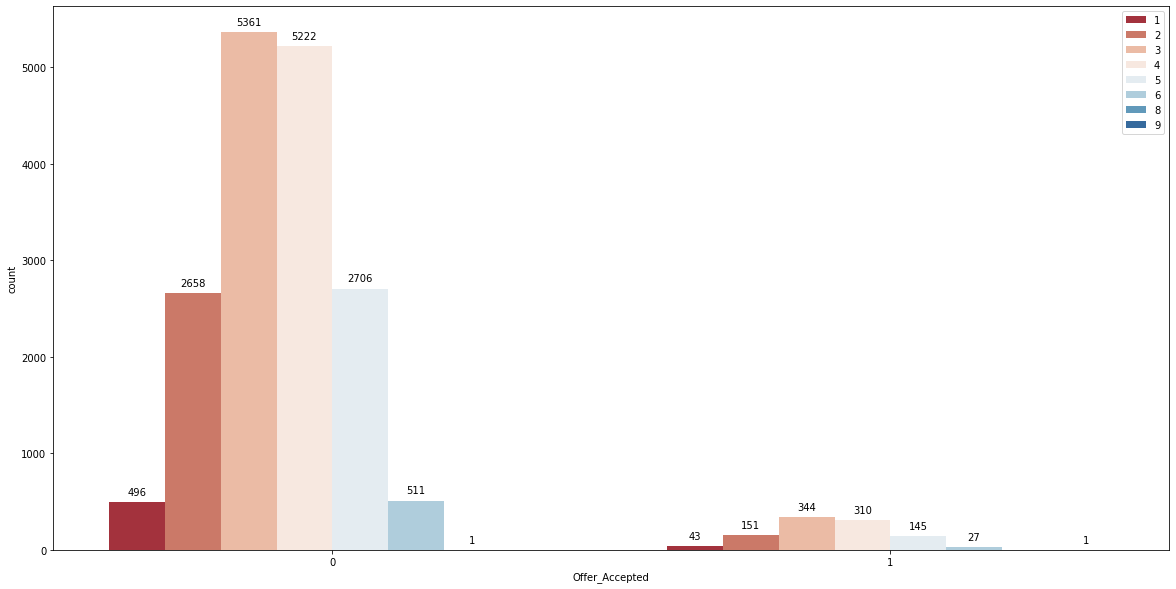

In [15]:
plt.figure(figsize=(20,10))
az=sns.countplot(data=df, x='Offer_Accepted',hue='Household_Size',palette='RdBu')
for i in az.patches: #making annotation
    az.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2.,i.get_height()),
               ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')

plt.legend()


# Income_Level >< Credit_Rating

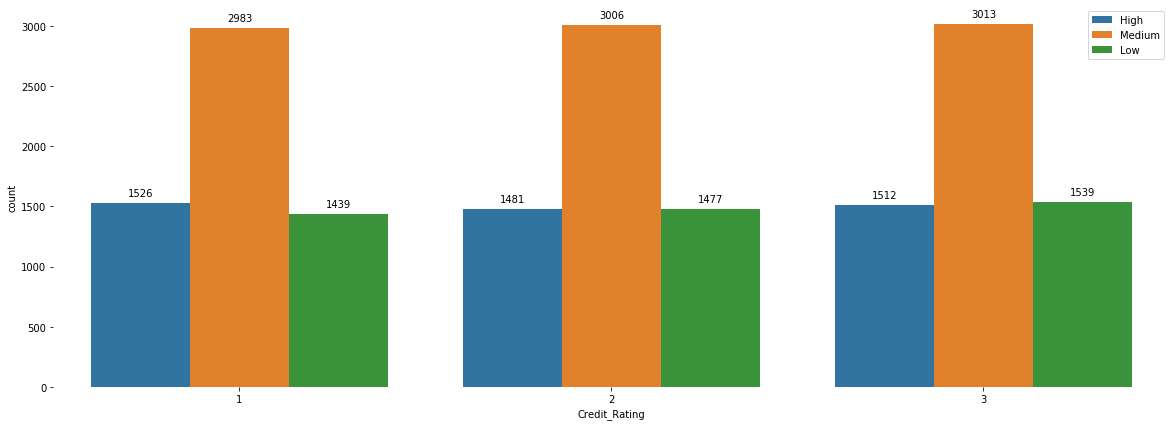

In [16]:
plt.figure(figsize=(20,7))
gg=sns.countplot(data=df, x='Credit_Rating',hue='Income_Level')
for i in gg.patches: #making annotation
    gg.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2.,i.get_height()),
               ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')
sns.despine(left=True, bottom=True, right=True)
plt.legend()

# Homes_Owned

Text(0.5, 1.0, 'Kepemilikan Rumah Nasabah')

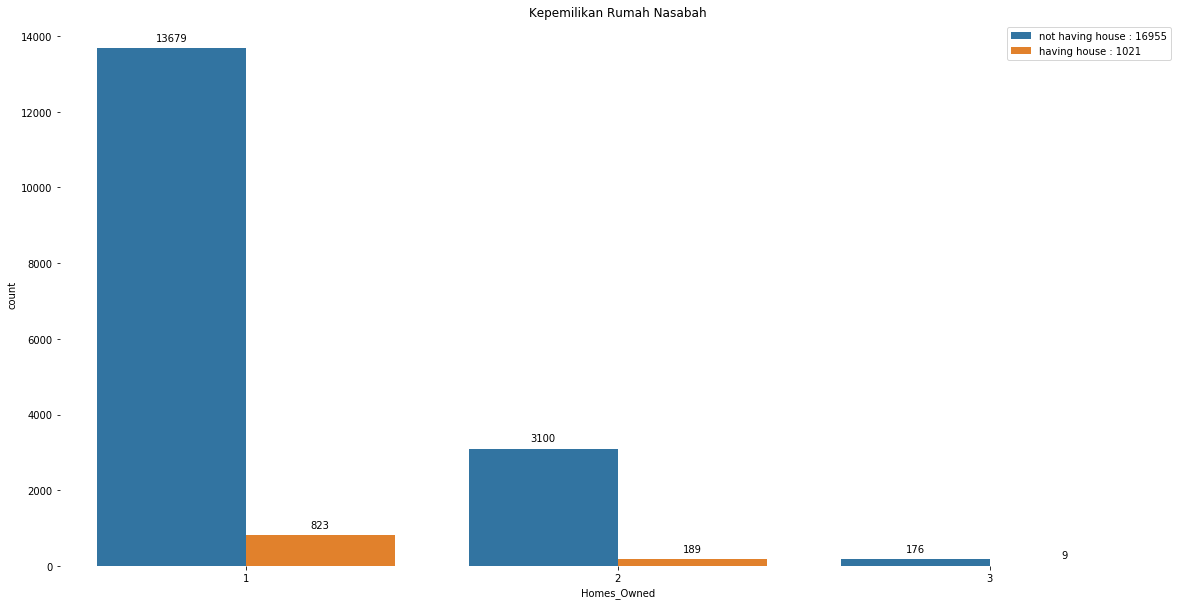

In [17]:
plt.figure(figsize=(20,10))
x = df['Offer_Accepted'].value_counts()
n=sns.countplot(data=df,x='Homes_Owned',hue='Offer_Accepted')
for i in n.patches: #making annotation
    n.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2.,i.get_height()),
               ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')
sns.despine(left=True, bottom=True, right=True)
e=plt.legend()
e.get_texts()[0].set_text(f'not having house : {x[0]}')
e.get_texts()[1].set_text(f'having house : {x[1]}')
plt.title('Kepemilikan Rumah Nasabah')

# Household_Size >< Average_Balance

Text(0.5, 1, 'Diagram Average Balance terhadap Kepemilikan Rumah')

<Figure size 3600x1440 with 0 Axes>

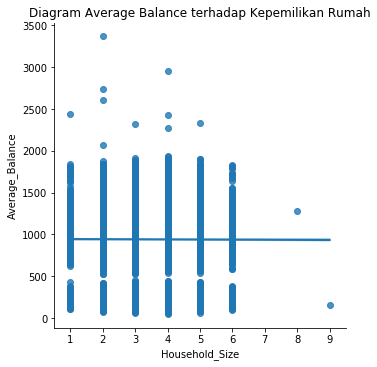

In [18]:
plt.figure(figsize=(50,20))
sns.lmplot(data=df, x='Household_Size',y='Average_Balance')
plt.title('Diagram Average Balance terhadap Kepemilikan Rumah')

# Offer_Accepted (PIE)

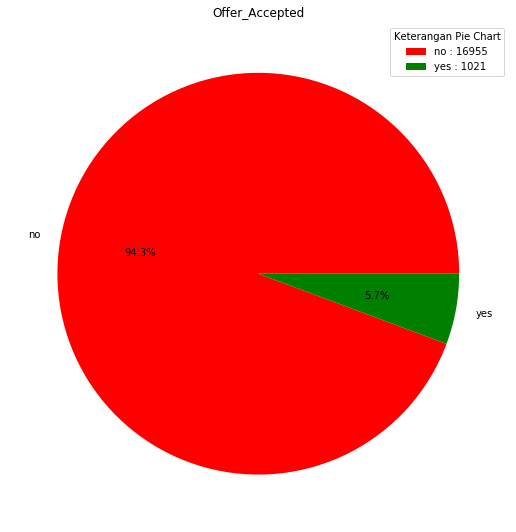

In [19]:
x = df['Offer_Accepted'].value_counts()
y = ['no','yes']
plt.figure(figsize=(9,13))
plt.pie(x,autopct='%1.1f%%',labels=y,colors='rg')
plt.title('Offer_Accepted')
n=plt.legend(title='Keterangan Pie Chart')
n.get_texts()[0].set_text(f'no : {x[0]}')
n.get_texts()[1].set_text(f'yes : {x[1]}')

# Credit_Cards_Held => income_level

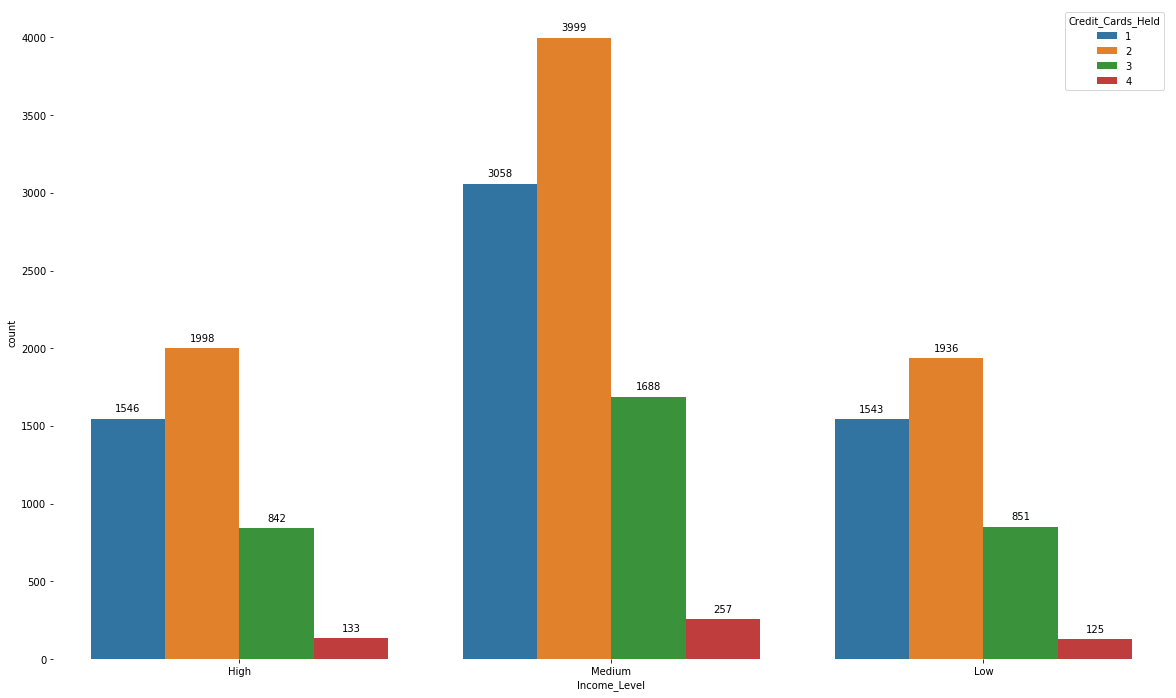

In [20]:
plt.figure(figsize=(20,12))
n=sns.countplot(data=df,hue='Credit_Cards_Held',x='Income_Level')
sns.despine(left=True, bottom=True, right=True)
for i in n.patches: #making annotation
    n.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2.,i.get_height()),
               ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')


# Reward

Text(0.5, 1.0, 'Nasabah Yang Memiliki Reward Tertentu')

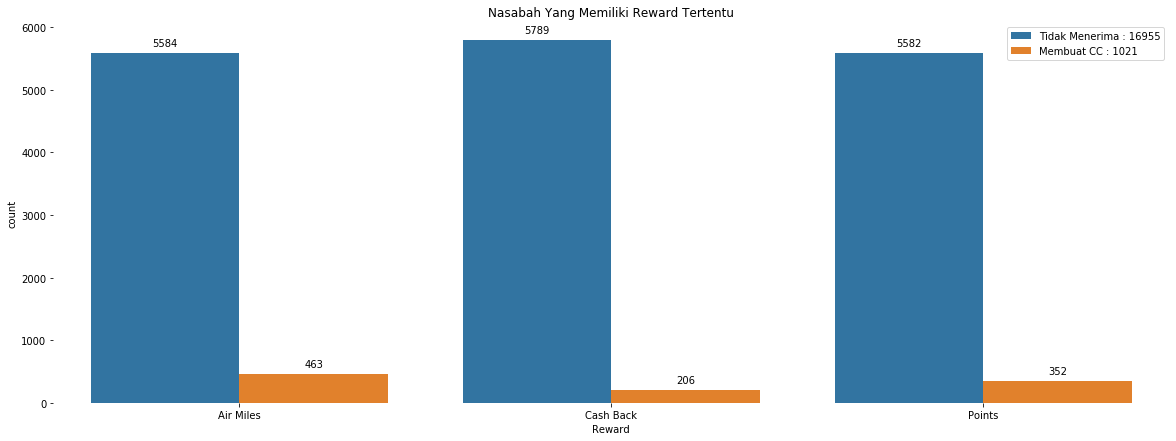

In [21]:
plt.figure(figsize=(20,7))
x = df['Offer_Accepted'].value_counts()
n=sns.countplot(data=df,x='Reward',hue='Offer_Accepted')
for i in n.patches: #making annotation
    n.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2.,i.get_height()),
               ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')
sns.despine(left=True, bottom=True, right=True)
n=plt.legend()
n.get_texts()[0].set_text(f'Tidak Menerima : {x[0]}')
n.get_texts()[1].set_text(f'Membuat CC : {x[1]}')
plt.title('Nasabah Yang Memiliki Reward Tertentu')

In [22]:
df.head()

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accnt_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,0,Air Miles,Letter,High,1,No,3,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,0,Air Miles,Letter,Medium,1,No,2,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,0,Air Miles,Postcard,High,2,No,2,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,0,Air Miles,Letter,Medium,2,No,3,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,0,Air Miles,Letter,Medium,1,No,2,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


# pairplot

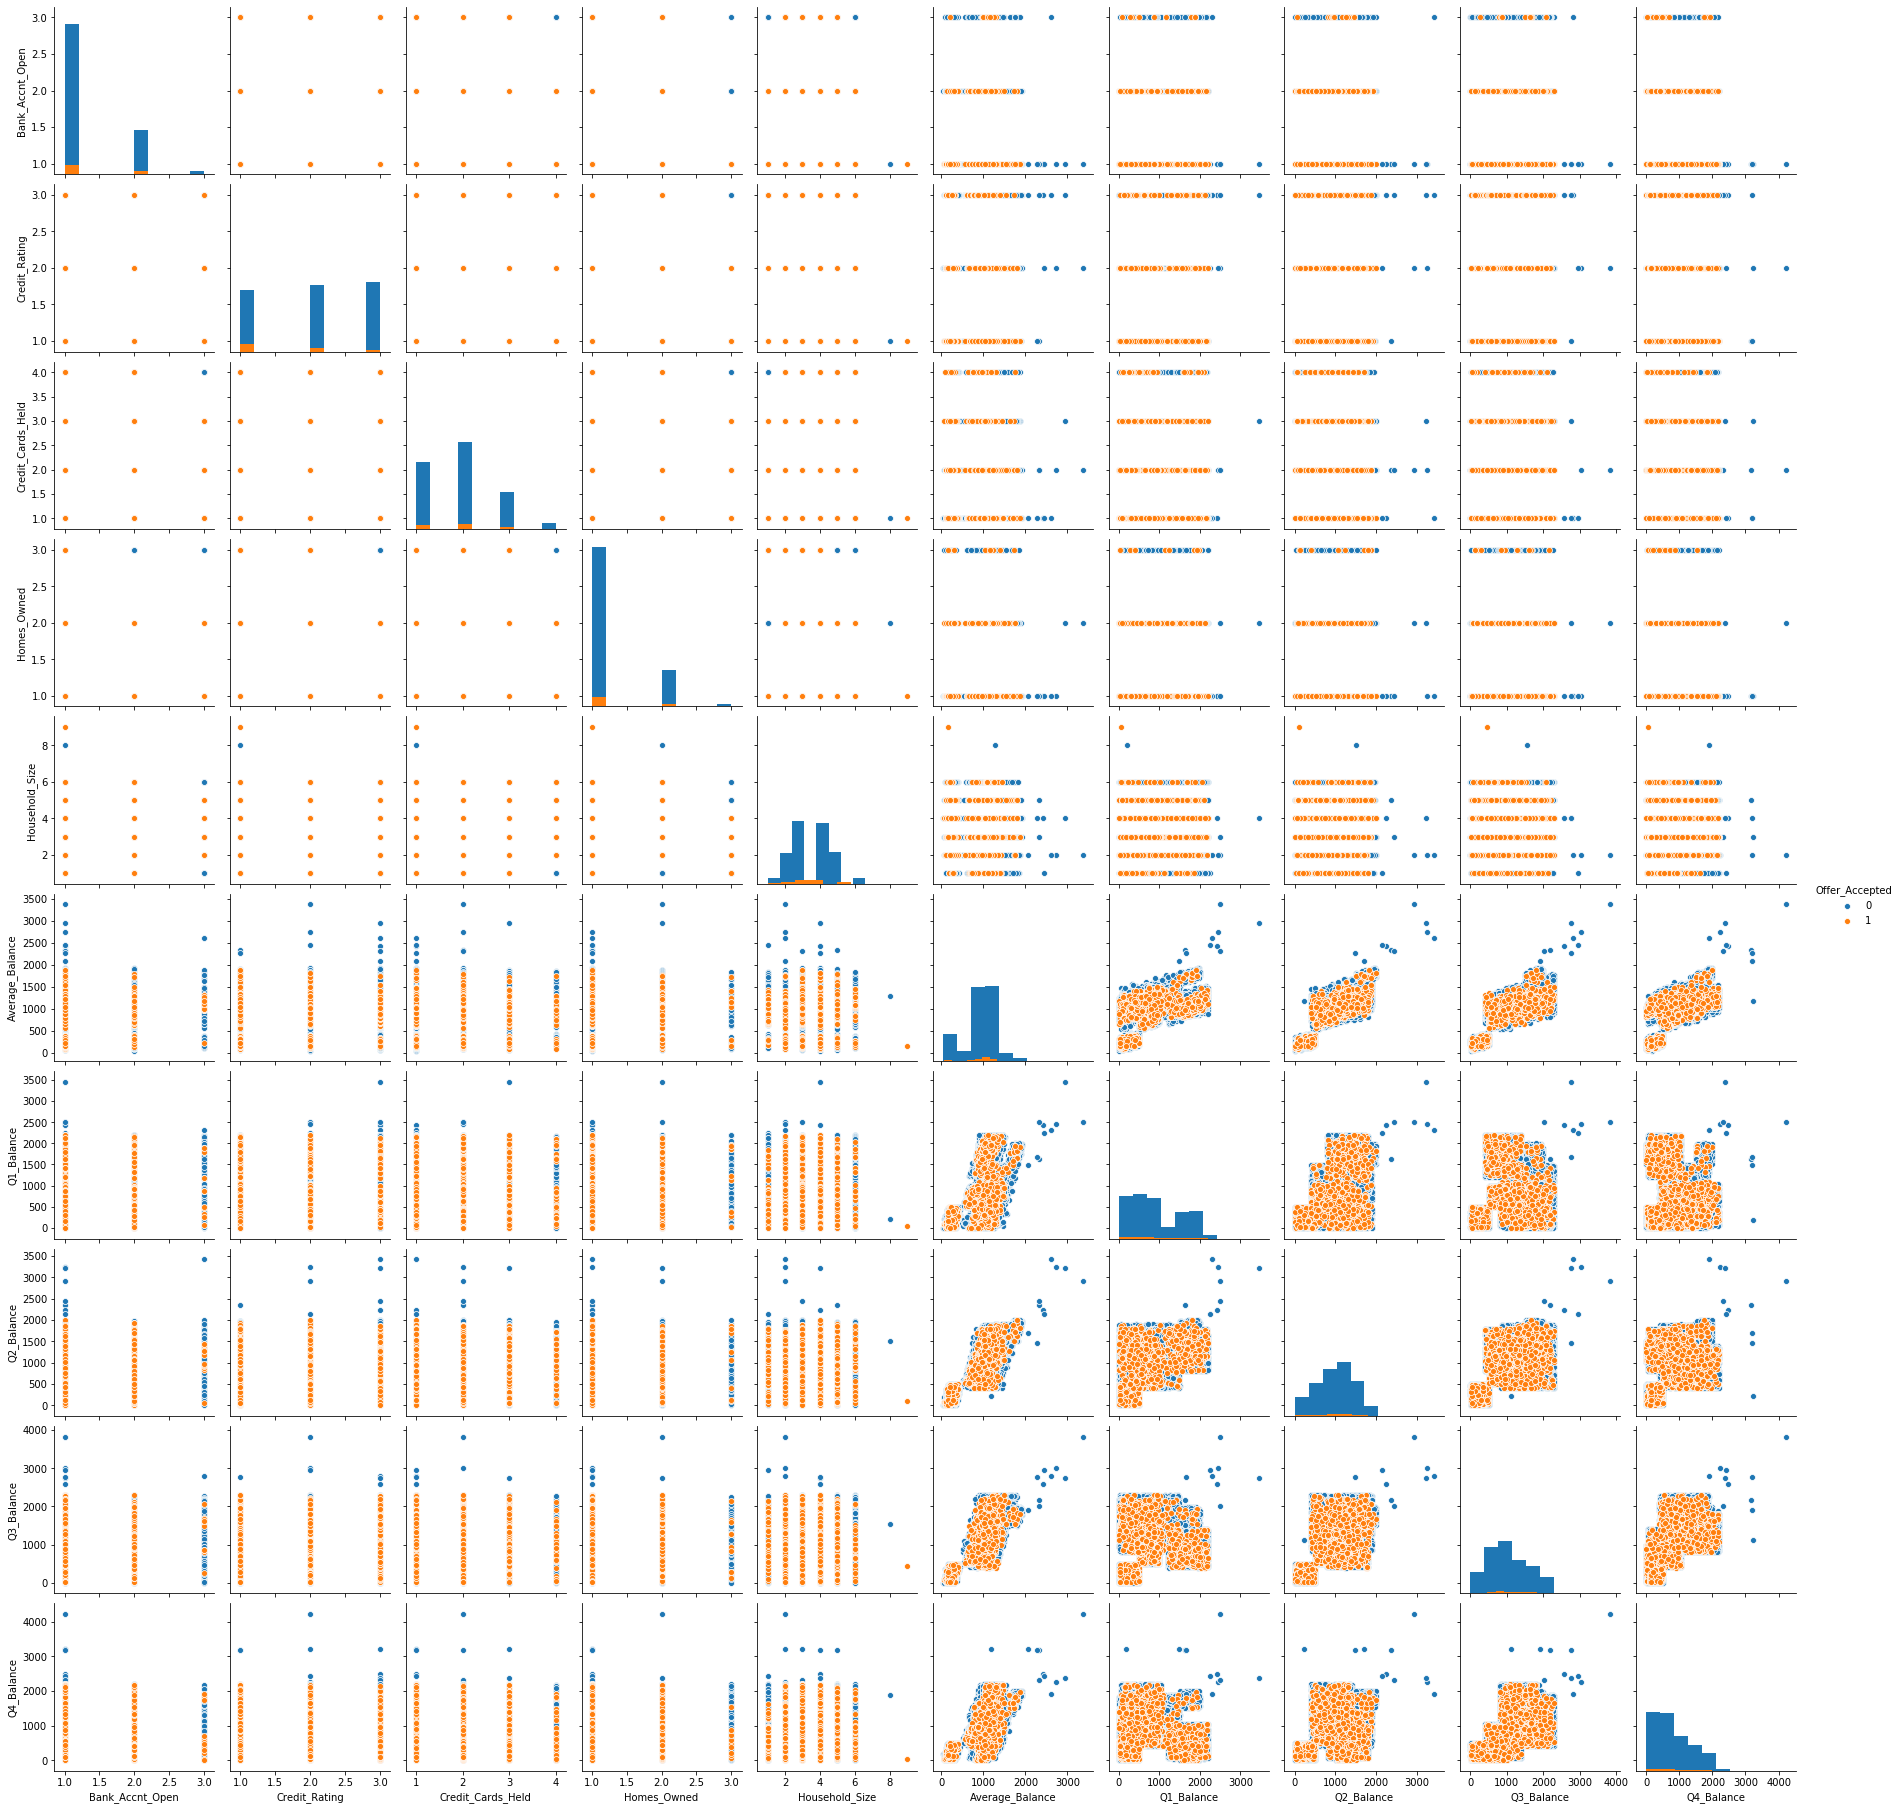

In [23]:
sns.pairplot(data=df,hue='Offer_Accepted',diag_kind='hist')

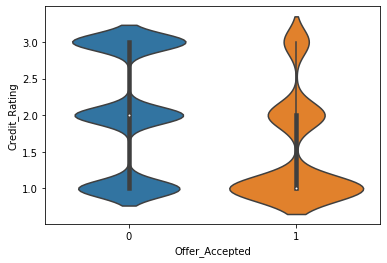

In [24]:
sns.violinplot(data=df,x='Offer_Accepted',y='Credit_Rating')

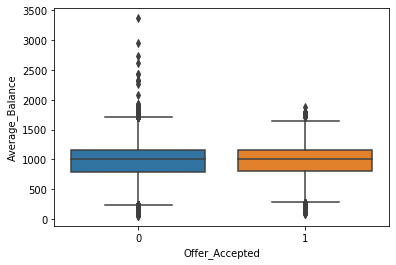

In [25]:
sns.boxplot(data=df,x='Offer_Accepted',y='Average_Balance')

In [39]:
df.head()

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accnt_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,0,Air Miles,Letter,High,1,No,3,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,0,Air Miles,Letter,Medium,1,No,2,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,0,Air Miles,Postcard,High,2,No,2,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,0,Air Miles,Letter,Medium,2,No,3,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,0,Air Miles,Letter,Medium,1,No,2,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


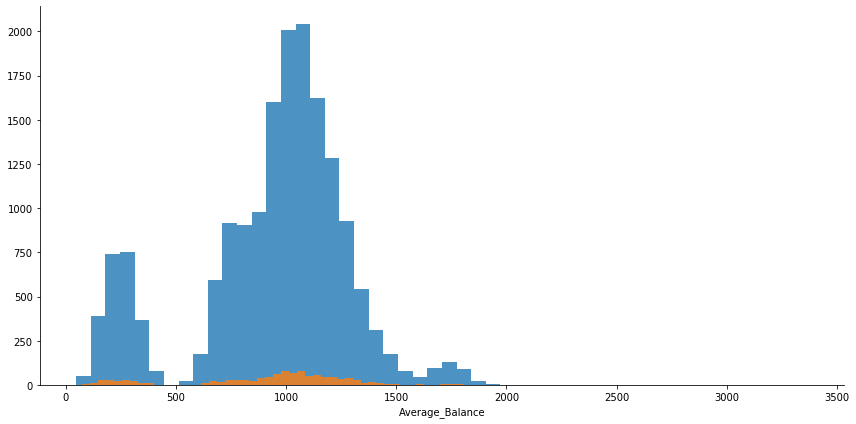

In [53]:
g = sns.FacetGrid(df,hue='Offer_Accepted',size=6,aspect=2)
g = g.map(plt.hist,'Average_Balance',bins=50,alpha=0.8)